# HELP performance in E vs NE problem

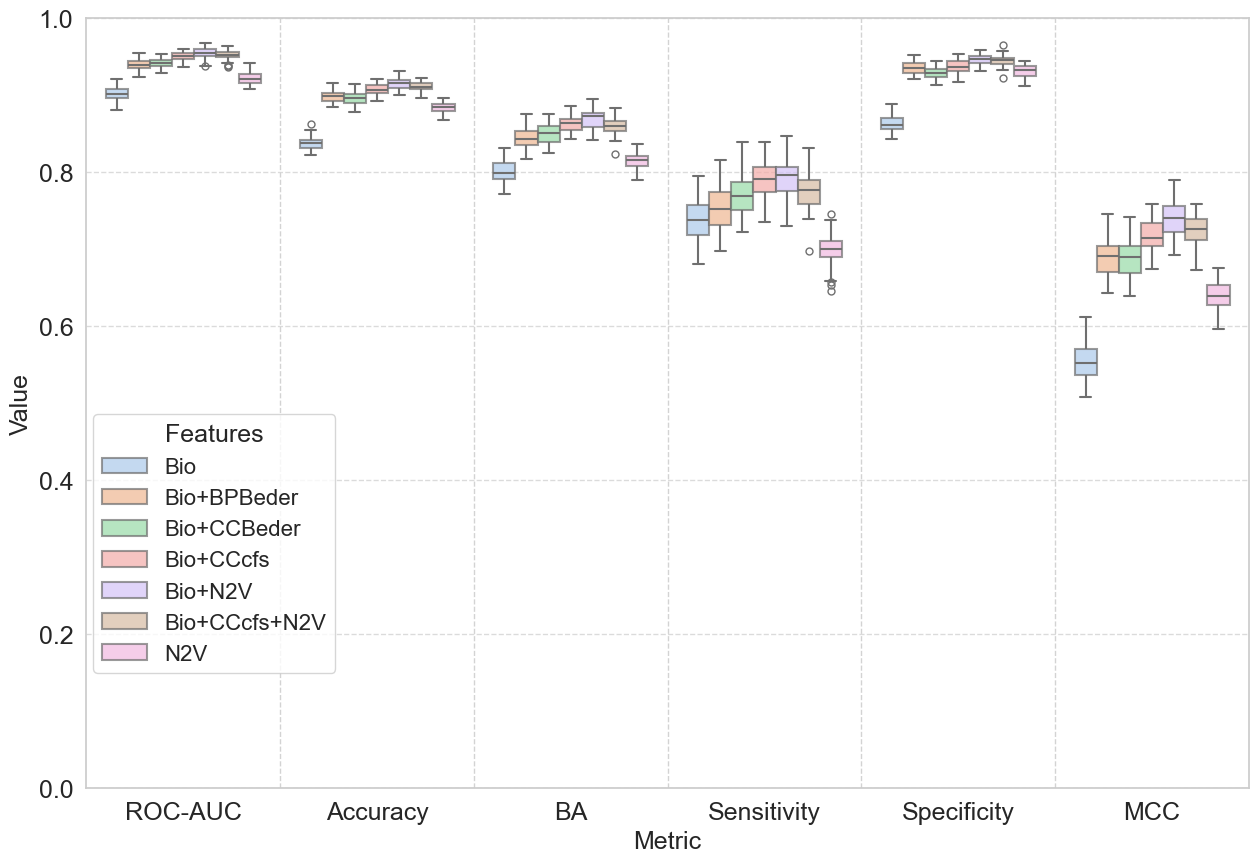

In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

tissue = 'Kidney'
problem = 'EvsNE'
method1 = 'HELP'
method2 = 'AdAM'
method3 = 'FiPer'
method4 = 'OGEE'

scorepath = '../scores'
features = ["Bio", "Bio+BPBeder", "Bio+CCBeder", "Bio+CCcfs", "Bio+N2V", "Bio+CCcfs+N2V", "N2V"]
suffixes = ['bio', 'biobpbeder', 'bioccbeder', 'biocc', 'bion2v', 'bioccn2v','n2v']

# Upload input datasets
dfs = []
for feature,suffix in zip(features,suffixes):
    df_tmp = pd.read_csv(os.path.join(scorepath, f"score_{method1}_{tissue}_{problem}_{suffix}.csv")).drop("CM", axis=1)
    df_tmp['Feature'] = feature
    dfs += [df_tmp]

# Merge datasets and modify the dataframe for boxplot generation
Scores = pd.concat(dfs)
Scores = pd.melt(Scores, id_vars=["Feature"], var_name="Metric", value_name="Value")

# Set seaborn style
sns.set(style="whitegrid", palette="pastel")

# Generate boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(x="Metric", y="Value", hue="Feature", data=Scores, dodge=True,
            linewidth=1.5, fliersize=5, saturation=0.75, notch=False, boxprops=dict(alpha=0.7))

plt.ylim(0, 1)
#plt.title("Boxplots of Classification Metrics", fontsize=18)
plt.xlabel("Metric", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Value", fontsize=18)
plt.legend(title="Features", fontsize="16", title_fontsize="18", loc="upper center", bbox_to_anchor=(0.11, 0.5))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add vertical lines between groups of metric values
unique_metrics = Scores["Metric"].unique()
for i in range(1, len(unique_metrics)):
    plt.axvline(x=i - 0.5, color='lightgray', linestyle='--', linewidth=1)

plt.show()


In [157]:
import pandas as pd
from tabulate import tabulate
method1 = 'HELP'
tissue = 'Kidney'
df_p = pd.DataFrame()
features = ["Bio", "Bio+BPBeder", "Bio+CCBeder", "Bio+CCcfs", "Bio+N2V", "Bio+CCcfs+N2V", "N2V"]
suffixes = ['bio', 'biobpbeder', 'bioccbeder', 'biocc', 'bion2v', 'bioccn2v','n2v']
for feature, suffix in zip(features,suffixes):
    print(feature, suffix)
    df = pd.read_csv(os.path.join(scorepath, f"score_{method1}_{tissue}_{problem}_{suffix}.csv"))
    metrics = df.drop(columns=['CM']).columns
    means, stds = df.drop(columns=['CM']).mean(), df.drop(columns=['CM']).std()
    row_df = pd.DataFrame([[f"{means[m]:.4f}±{stds[m]:.4f}" for m in metrics]], columns=metrics, index=[feature])
    row_df['CM'] = df['CM'].values[0].replace('\n', ',')
    df_p = pd.concat([df_p, row_df])

print(tabulate(df_p, headers=df_p.columns, tablefmt="latex"))
df_p

Bio bio
Bio+BPBeder biobpbeder
Bio+CCBeder bioccbeder
Bio+CCcfs biocc
Bio+N2V bion2v
Bio+CCcfs+N2V bioccn2v
N2V n2v
\begin{tabular}{llllllll}
\hline
               & ROC-AUC       & Accuracy      & BA            & Sensitivity   & Specificity   & MCC           & CM                     \\
\hline
 Bio           & 0.9018±0.0093 & 0.8375±0.0087 & 0.8005±0.0138 & 0.7378±0.0285 & 0.8633±0.0102 & 0.5535±0.0234 & [[175  73], [119 844]] \\
 Bio+BPBeder   & 0.9394±0.0070 & 0.8981±0.0074 & 0.8446±0.0134 & 0.7535±0.0280 & 0.9356±0.0083 & 0.6890±0.0225 & [[193  55], [ 75 883]] \\
 Bio+CCBeder   & 0.9418±0.0059 & 0.8965±0.0078 & 0.8497±0.0146 & 0.7704±0.0295 & 0.9291±0.0075 & 0.6883±0.0242 & [[204  45], [ 73 890]] \\
 Bio+CCcfs     & 0.9505±0.0058 & 0.9069±0.0075 & 0.8634±0.0110 & 0.7896±0.0224 & 0.9371±0.0090 & 0.7183±0.0209 & [[208  40], [ 64 900]] \\
 Bio+N2V       & 0.9547±0.0073 & 0.9147±0.0078 & 0.8696±0.0146 & 0.7932±0.0283 & 0.9461±0.0061 & 0.7388±0.0246 & [[197  51], [ 48 914]] \\
 Bio+CCcfs

,ROC-AUC,Accuracy,BA,Sensitivity,Specificity,MCC,CM
Bio,0.9018±0.0093,0.8375±0.0087,0.8005±0.0138,0.7378±0.0285,0.8633±0.0102,0.5535±0.0234,"[[175 73], [119 844]]"
Bio+BPBeder,0.9394±0.0070,0.8981±0.0074,0.8446±0.0134,0.7535±0.0280,0.9356±0.0083,0.6890±0.0225,"[[193 55], [ 75 883]]"
Bio+CCBeder,0.9418±0.0059,0.8965±0.0078,0.8497±0.0146,0.7704±0.0295,0.9291±0.0075,0.6883±0.0242,"[[204 45], [ 73 890]]"
Bio+CCcfs,0.9505±0.0058,0.9069±0.0075,0.8634±0.0110,0.7896±0.0224,0.9371±0.0090,0.7183±0.0209,"[[208 40], [ 64 900]]"
Bio+N2V,0.9547±0.0073,0.9147±0.0078,0.8696±0.0146,0.7932±0.0283,0.9461±0.0061,0.7388±0.0246,"[[197 51], [ 48 914]]"
Bio+CCcfs+N2V,0.9519±0.0063,0.9107±0.0062,0.8609±0.0118,0.7768±0.0250,0.9450±0.0070,0.7242±0.0193,"[[187 56], [ 42 906]]"
N2V,0.9222±0.0078,0.8837±0.0066,0.8146±0.0108,0.6975±0.0216,0.9316±0.0071,0.6383±0.0200,"[[180 69], [ 57 907]]"


In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

tissue = 'Kidney'
problem = 'EvsNE'
method1 = 'HELP'
method2 = 'AdAM'
method3 = 'FiPer'
method4 = 'OGEE'
methods = ['HELP', 'AdAM', 'FiPer', 'OGEE']

scorepath = '../scores'
features = ["Bio", "Bio+N2V"]
suffixes = ['bio', 'bion2v']
# Upload input datasets
dfs = []
for feature,suffix in zip(features,suffixes):
    for m in methods:
        df_tmp = pd.read_csv(os.path.join(scorepath, f"score_cmp_{method}_{tissue}_{problem}_{suffix}.csv")).drop("CM", axis=1)
        df_tmp['Feature'] = feature
        dfs += [df_tmp]

# Merge datasets and modify the dataframe for boxplot generation
Scores = pd.concat(dfs)
Scores = pd.melt(Scores, id_vars=["Feature"], var_name="Metric", value_name="Value")

# Set seaborn style
sns.set(style="whitegrid", palette="pastel")

# Generate boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(x="Metric", y="Value", hue="Feature", data=Scores, dodge=True,
            linewidth=1.5, fliersize=5, saturation=0.75, notch=False, boxprops=dict(alpha=0.7))

plt.ylim(0, 1)
#plt.title("Boxplots of Classification Metrics", fontsize=18)
plt.xlabel("Metric", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Value", fontsize=18)
plt.legend(title="Features", fontsize="16", title_fontsize="18", loc="upper center", bbox_to_anchor=(0.15, 0.5))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add vertical lines between groups of metric values
unique_metrics = Scores["Metric"].unique()
for i in range(1, len(unique_metrics)):
    plt.axvline(x=i - 0.5, color='lightgray', linestyle='--', linewidth=1)

plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '../scores/score_cmp_OGEE_Kidney_EvsNE_bion2v.csv'

In [154]:
import pandas as pd
from tabulate import tabulate
tissue = 'Kidney'
problem = 'EvsNE'
methods = ['HELP', 'AdAM', 'FiPer', 'OGEE']
df_p = pd.DataFrame()
features = {"Bio+CCcfs+N2V", "Bio"}
suffixes = ['bioccn2v', 'bio']
for feature, suffix in zip(features,suffixes):
    for method in methods:
        df = pd.read_csv(os.path.join(scorepath, f"score_cmp_{method}_{tissue}_{problem}_{suffix}.csv"))
        metrics = df.drop(columns=['CM']).columns
        means, stds = df.drop(columns=['CM']).mean(), df.drop(columns=['CM']).std()
        row_df = pd.DataFrame([[f"{means[m]:.4f}±{stds[m]:.4f}" for m in metrics]], columns=metrics, index=[method])
        row_df['CM'] = df['CM'].values[0].replace('\n', ',')
        df_p = pd.concat([df_p, row_df])

print(tabulate(df_p, headers=df_p.columns, tablefmt="latex"))
df_p

\begin{tabular}{llllllll}
\hline
       & ROC-AUC       & Accuracy      & BA            & Sensitivity   & Specificity   & MCC           & CM                     \\
\hline
 HELP  & 0.9516±0.0063 & 0.9090±0.0069 & 0.8587±0.0119 & 0.7737±0.0241 & 0.9437±0.0075 & 0.7194±0.0209 & [[199  43], [ 50 896]] \\
 AdAM  & 0.9455±0.0064 & 0.9087±0.0072 & 0.8569±0.0110 & 0.7695±0.0203 & 0.9444±0.0072 & 0.7178±0.0214 & [[193  60], [ 70 916]] \\
 FiPer & 0.9300±0.0094 & 0.8997±0.0071 & 0.8403±0.0122 & 0.7404±0.0247 & 0.9402±0.0077 & 0.6873±0.0216 & [[210  62], [ 81 987]] \\
 OGEE  & 0.9428±0.0069 & 0.8995±0.0087 & 0.8415±0.0149 & 0.7431±0.0300 & 0.9398±0.0091 & 0.6893±0.0267 & [[125  52], [ 38 645]] \\
 HELP  & 0.8986±0.0096 & 0.8376±0.0109 & 0.8004±0.0142 & 0.7375±0.0272 & 0.8633±0.0128 & 0.5528±0.0263 & [[191  52], [140 806]] \\
 AdAM  & 0.8890±0.0113 & 0.8321±0.0113 & 0.7938±0.0152 & 0.7290±0.0305 & 0.8585±0.0138 & 0.5392±0.0275 & [[183  70], [131 856]] \\
 FiPer & 0.8776±0.0105 & 0.8306±0.0089 & 0.

,ROC-AUC,Accuracy,BA,Sensitivity,Specificity,MCC,CM
HELP,0.9516±0.0063,0.9090±0.0069,0.8587±0.0119,0.7737±0.0241,0.9437±0.0075,0.7194±0.0209,"[[199 43], [ 50 896]]"
AdAM,0.9455±0.0064,0.9087±0.0072,0.8569±0.0110,0.7695±0.0203,0.9444±0.0072,0.7178±0.0214,"[[193 60], [ 70 916]]"
FiPer,0.9300±0.0094,0.8997±0.0071,0.8403±0.0122,0.7404±0.0247,0.9402±0.0077,0.6873±0.0216,"[[210 62], [ 81 987]]"
OGEE,0.9428±0.0069,0.8995±0.0087,0.8415±0.0149,0.7431±0.0300,0.9398±0.0091,0.6893±0.0267,"[[125 52], [ 38 645]]"
HELP,0.8986±0.0096,0.8376±0.0109,0.8004±0.0142,0.7375±0.0272,0.8633±0.0128,0.5528±0.0263,"[[191 52], [140 806]]"
AdAM,0.8890±0.0113,0.8321±0.0113,0.7938±0.0152,0.7290±0.0305,0.8585±0.0138,0.5392±0.0275,"[[183 70], [131 856]]"
FiPer,0.8776±0.0105,0.8306±0.0089,0.7883±0.0152,0.7173±0.0317,0.8594±0.0104,0.5304±0.0251,"[[192 80], [162 907]]"
OGEE,0.8805±0.0117,0.8251±0.0130,0.7709±0.0204,0.6792±0.0403,0.8625±0.0143,0.5061±0.0359,"[[118 59], [ 87 599]]"
